In [1]:
import sys
sys.path.append("/home/susan/rdkit/Contrib/IFG/")
import ifg
from rdkit import Chem
import pandas as pd
import operator
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Let's try one example SMILES

In [2]:
m = Chem.MolFromSmiles('Cc1nc(NS(=O)(=O)c2ccc(N)cc2)nc(C)c1')
ifg.identify_functional_groups(m)

[IFG(atomIds=(2,), atoms='n', type='cnc'),
 IFG(atomIds=(4, 5, 6, 7), atoms='NS(=O)=O', type='cNS(c)(=O)=O'),
 IFG(atomIds=(12,), atoms='N', type='cN'),
 IFG(atomIds=(15,), atoms='n', type='cnc')]

For one molecule it outputs a list of all functional groups present

Let's try using it with the DSPL full library found here
https://www.diamond.ac.uk/Instruments/dms/MX/FragmentsResources/DSPL_full_library.xlsx

In [3]:
df = pd.read_excel("/home/susan/Downloads/DSPL_full_library.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 7 columns):
1536 Location    772 non-null object
NAME             772 non-null object
SMILES           772 non-null object
Supplier         772 non-null object
Supplier_code    772 non-null object
molWeight        772 non-null float64
Conc (mMol)      772 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 42.3+ KB


In [5]:
smiles = df.SMILES.values.tolist()
print("Length of SMILES: %i" %len(smiles))

Length of SMILES: 772


Now let's calculate the FGs for each SMILES 

In [6]:
all_res = []
for sm in smiles:
    m = Chem.MolFromSmiles(sm)
    res = ifg.identify_functional_groups(m)
    all_res.append(res)

Then create a dictionary with the types of functional groups in the DSPL library and in what proportion they are present. If a functional group is present more than once in a molecule then we only count it once.

In [7]:
types = {}
for res in all_res: # looping through mols
    tmp = []
    for ifg in res:
        # make sure the count of types is max once per molecule
        if ifg.type in tmp: continue
        else: tmp.append(ifg.type)
            
        if ifg.type not in types.keys():
            types[ifg.type] = 1
        else:
            types[ifg.type] += 1

In [8]:
types

{'C[NH+](C)C': 106,
 'cN(C)C': 52,
 'c[nH+]c': 3,
 'cCl': 49,
 'cOC': 123,
 'C[NH2+]C': 48,
 'cF': 60,
 'CC#N': 16,
 'COC': 81,
 'cO': 51,
 'cNC(C)=O': 103,
 'cNC(N)=S': 3,
 'cnc': 170,
 'cnoc': 37,
 'COC(C)=O': 16,
 'C[NH3+]': 15,
 'CF': 25,
 'CC(=O)[O-]': 14,
 'CN(C)C(=O)N(C)C': 3,
 'cC(=O)[O-]': 17,
 'cN': 58,
 'CC(=O)N(C)C': 28,
 'cN(C)N': 1,
 'coc': 55,
 'cNS(C)(=O)=O': 6,
 'csc': 92,
 'cC(N)=S': 1,
 'cC#N': 21,
 'CO': 50,
 'COC(=O)N(C)C': 7,
 'cnnc': 40,
 'c[nH]c': 48,
 'CNS(C)(=O)=O': 4,
 'c1cnon1': 6,
 'cNC': 25,
 'CNC(C)=O': 42,
 'CNC(=O)NC': 7,
 'cNC(=O)OC': 13,
 'cNC(c)=O': 52,
 'cC(=O)N(C)C': 22,
 'cn[nH]c': 19,
 'cNC(=O)N(C)C': 11,
 'cC(=O)NC': 44,
 'c1csnn1': 8,
 'CS(C)(=O)=O': 5,
 'c=O': 23,
 'c1cOCO1': 12,
 'cNc': 28,
 'cNC(=O)NC': 17,
 'CNC(=O)N(C)C': 8,
 'c-n(c)c': 3,
 'cC(=O)n(c)c': 1,
 'CC(N)=O': 16,
 'Cn1ncnn1': 8,
 'cSC': 10,
 'cS(=O)(=O)N(C)C': 3,
 'CN(C)S(C)(=O)=O': 3,
 'cC(N)=O': 19,
 'cNC(C)=CC(C)=O': 4,
 'c-n1cnnn1': 2,
 'cN1C(=O)CCC1=O': 1,
 'cn(c)N': 1,
 'c

In [9]:
sorted_types = sorted(types.items(), key=operator.itemgetter(1),  reverse=True)
sorted_types

[('cnc', 170),
 ('cOC', 123),
 ('C[NH+](C)C', 106),
 ('cNC(C)=O', 103),
 ('csc', 92),
 ('COC', 81),
 ('cF', 60),
 ('cN', 58),
 ('coc', 55),
 ('cN(C)C', 52),
 ('cNC(c)=O', 52),
 ('cO', 51),
 ('CO', 50),
 ('cCl', 49),
 ('C[NH2+]C', 48),
 ('c[nH]c', 48),
 ('cC(=O)NC', 44),
 ('CNC(C)=O', 42),
 ('cnnc', 40),
 ('cnoc', 37),
 ('cC(=O)OC', 31),
 ('CC(=O)N(C)C', 28),
 ('cNc', 28),
 ('CF', 25),
 ('cNC', 25),
 ('c=O', 23),
 ('cC(=O)N(C)C', 22),
 ('cC#N', 21),
 ('cn[nH]c', 19),
 ('cC(N)=O', 19),
 ('cC(=O)[O-]', 17),
 ('cNC(=O)NC', 17),
 ('cnn(c)C', 17),
 ('CC#N', 16),
 ('COC(C)=O', 16),
 ('CC(N)=O', 16),
 ('C[NH3+]', 15),
 ('CC(=O)[O-]', 14),
 ('cNC(=O)OC', 13),
 ('c1cOCO1', 12),
 ('cNC(=O)N(C)C', 11),
 ('cSC', 10),
 ('cn(c)C', 10),
 ('cC(C)=O', 10),
 ('c1csnn1', 8),
 ('CNC(=O)N(C)C', 8),
 ('Cn1ncnn1', 8),
 ('cNC(=O)Nc', 8),
 ('COC(=O)N(C)C', 7),
 ('CNC(=O)NC', 7),
 ('cNS(C)(=O)=O', 6),
 ('c1cnon1', 6),
 ('CS(C)(=O)=O', 5),
 ('cC(=O)NN', 5),
 ('cS(N)(=O)=O', 5),
 ('cNNC(c)=O', 5),
 ('CNS(C)(=O)=O'

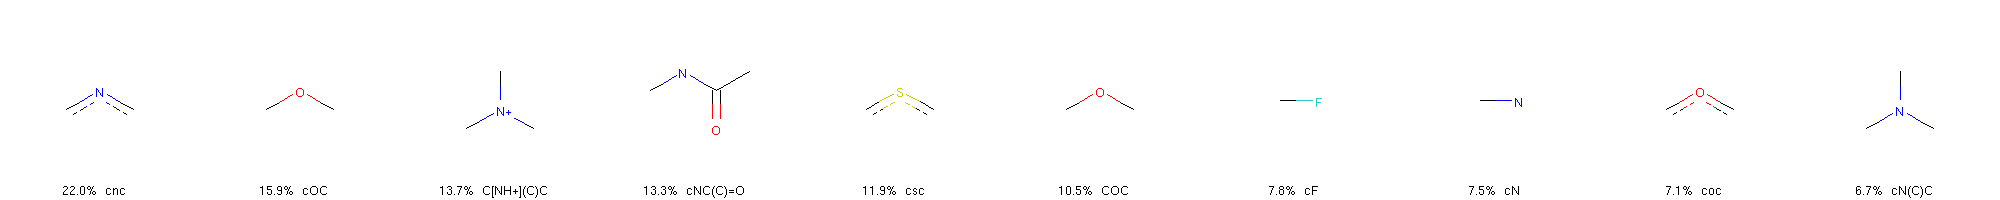

In [10]:
legs = []
for sm, count in sorted_types[:10]:
    pc = "%.1f" %(count/float(len(smiles))*100)
    legs.append("%s%% \t %s" %(pc, sm))
    
Draw.MolsToImage([Chem.MolFromSmarts(x) for x,y in sorted_types[:10]],
                     legends=legs
                    )

Nice! Now we have most common functional groups from the DSPL library. The percentages are shown below which shows the proportion of molecules in the DSPL library in which this particular group is present.